# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from physics.ct_ops import CTProjector
from utils.metrics import calculate_metrics

# Setup & data generation

In [5]:
# init pipeline
res = 256
projector = CTProjector(size=res)
theta_full = np.linspace(0., 180., 180, endpoint=False)

# Generate gt sinogram
sinogram_full = projector.project(theta_full)

# Simple vs filtered backprojection

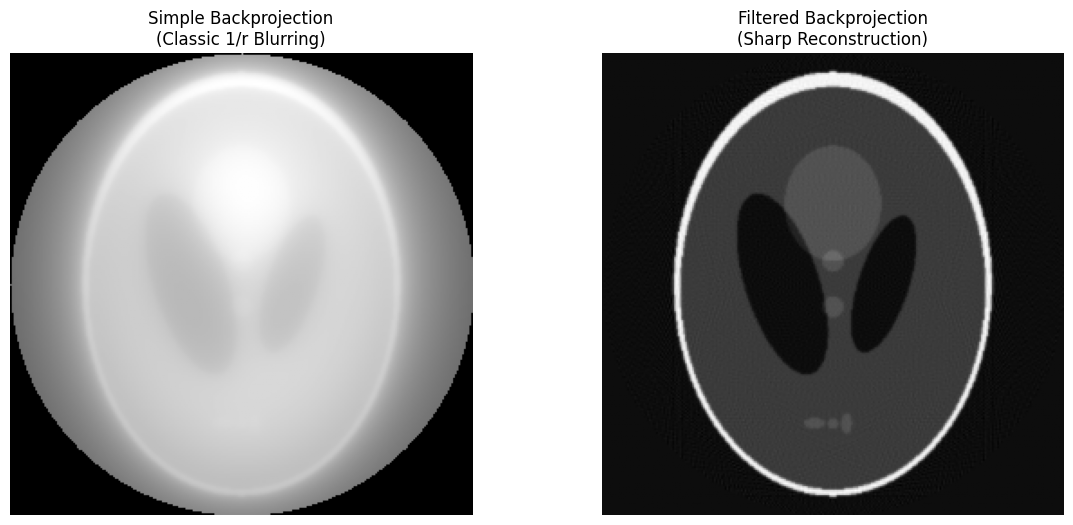

In [6]:
from skimage.transform import iradon
unfiltered = iradon(sinogram_full, theta=theta_full, filter_name=None)

filtered = iradon(sinogram_full, theta=theta_full, filter_name='ramp')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(unfiltered, cmap='gray')
axes[0].set_title("Simple Backprojection\n(Classic 1/r Blurring)")
axes[1].imshow(filtered, cmap='gray')
axes[1].set_title("Filtered Backprojection\n(Sharp Reconstruction)")
for ax in axes: ax.axis('off')
plt.show()

# Artifacts

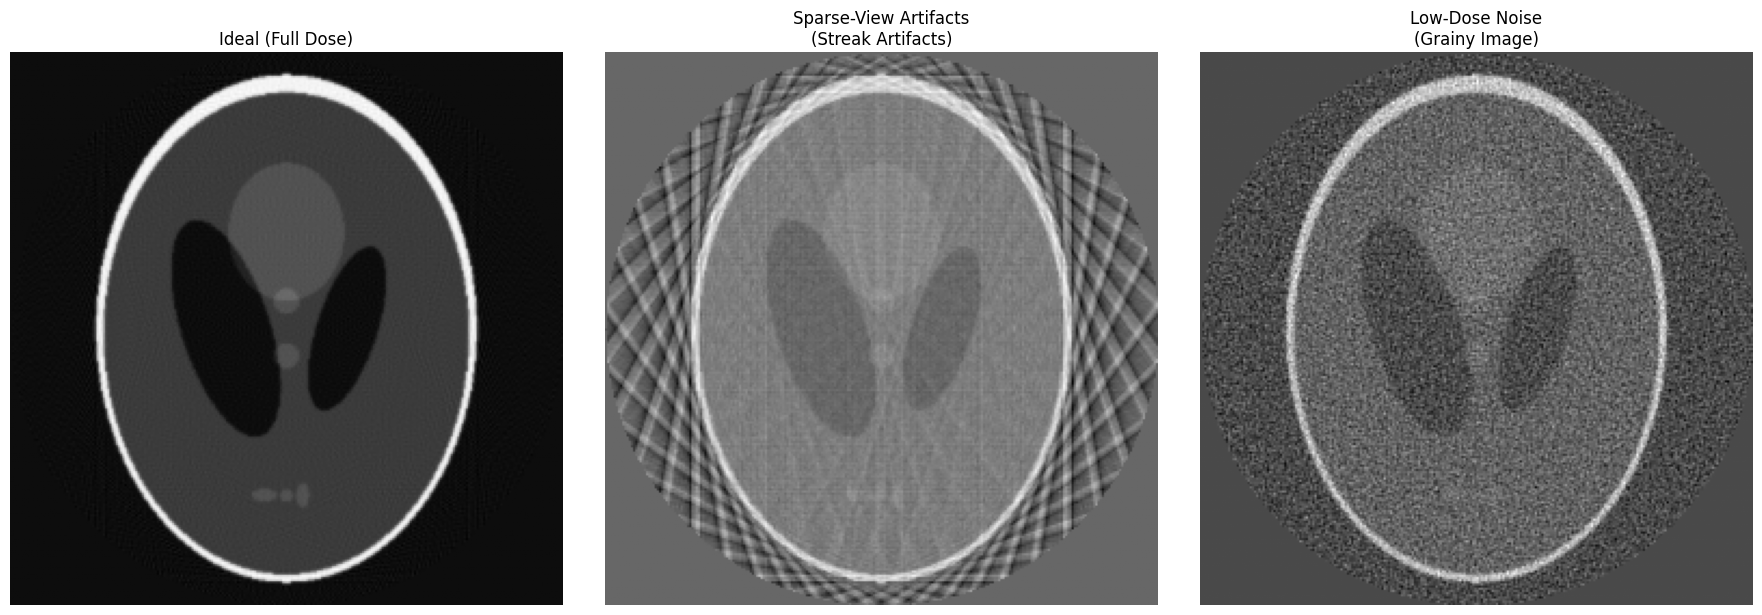

In [7]:
# 1. Sparse View (Few angles)
theta_sparse = np.linspace(0., 180., 20, endpoint=False)
sinogram_sparse = projector.project(theta_sparse)
recon_sparse = projector.reconstruct(sinogram_sparse, theta_sparse)

# 2. Low Dose (Noise)
noise_level = 0.05
sinogram_noisy = sinogram_full + np.random.normal(0, noise_level * np.max(sinogram_full), sinogram_full.shape)
recon_noisy = projector.reconstruct(sinogram_noisy, theta_full)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(filtered, cmap='gray')
axes[0].set_title("Ideal (Full Dose)")

axes[1].imshow(recon_sparse, cmap='gray')
axes[1].set_title("Sparse-View Artifacts\n(Streak Artifacts)")

axes[2].imshow(recon_noisy, cmap='gray')
axes[2].set_title("Low-Dose Noise\n(Grainy Image)")

for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()